In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv("govt.csv")
df

,ac_year,st_code,state_name,dt_code,district_name,block_cd,udise_block_name,loc_name,sch_category_id,tr_cat_name,...,class3_girl,class4_girl,class5_girl,class6_girl,class7_girl,class8_girl,class9_girl,class10_girl,class11_girl,class12_girl
0,2019-20,27,Maharashtra,2725,PUNE,272501,AMBEGAON,Rural,2,cat2,...,77,73,76,72,65,0,0,0,0,0
1,2019-20,27,Maharashtra,2725,PUNE,272502,BARAMATI,Rural,2,cat2,...,134,150,144,149,148,0,0,0,0,0
2,2019-20,27,Maharashtra,2725,PUNE,272503,BHOR,Rural,2,cat2,...,67,57,94,66,88,8,0,0,0,0
3,2019-20,27,Maharashtra,2725,PUNE,272504,DAUND,Rural,2,cat2,...,288,288,293,311,265,3,0,0,0,0
4,2019-20,27,Maharashtra,2725,PUNE,272505,HAVELI,Rural,2,cat2,...,413,381,379,341,295,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2019-20,27,Maharashtra,2725,PUNE,272508,KHED,Rural,7,cat7,...,0,0,0,2,3,2,3,4,0,0
2020,2019-20,27,Maharashtra,2725,PUNE,272511,PURANDAR,Rural,7,cat7,...,0,0,0,0,0,0,0,0,0,0
2021,2019-20,27,Maharashtra,2725,PUNE,272505,HAVELI,Urban,2,cat2,...,0,0,0,0,0,0,0,0,0,0
2022,2019-20,27,Maharashtra,2725,PUNE,272518,Pune City,Urban,2,cat2,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ac_year           2024 non-null   object
 1   st_code           2024 non-null   int64 
 2   state_name        2024 non-null   object
 3   dt_code           2024 non-null   int64 
 4   district_name     2024 non-null   object
 5   block_cd          2024 non-null   int64 
 6   udise_block_name  2024 non-null   object
 7   loc_name          2024 non-null   object
 8   sch_category_id   2024 non-null   int64 
 9   tr_cat_name       2024 non-null   object
 10  school_category   2024 non-null   object
 11  sch_mgmt_id       2024 non-null   int64 
 12  sch_mgmt_name     2024 non-null   object
 13  caste_id          2024 non-null   int64 
 14  caste_name        2024 non-null   object
 15  pre_primary_boy   2024 non-null   int64 
 16  pre_primary_girl  2024 non-null   int64 
 17  class1_boy    

In [38]:
df.isnull().sum()

ac_year             0
st_code             0
state_name          0
dt_code             0
district_name       0
block_cd            0
udise_block_name    0
loc_name            0
sch_category_id     0
tr_cat_name         0
school_category     0
sch_mgmt_id         0
sch_mgmt_name       0
caste_id            0
caste_name          0
pre_primary_boy     0
pre_primary_girl    0
class1_boy          0
class2_boy          0
class3_boy          0
class4_boy          0
class5_boy          0
class6_boy          0
class7_boy          0
class8_boy          0
class9_boy          0
class10_boy         0
class11_boy         0
class12_boy         0
class1_girl         0
class2_girl         0
class3_girl         0
class4_girl         0
class5_girl         0
class6_girl         0
class7_girl         0
class8_girl         0
class9_girl         0
class10_girl        0
class11_girl        0
class12_girl        0
dtype: int64

In [39]:
df['ac_year'].value_counts()

ac_year
2019-20    2024
Name: count, dtype: int64

In [40]:
df['st_code'].value_counts()

st_code
27    2024
Name: count, dtype: int64

In [41]:
df["total_enrollment"] = df.iloc[:, 15:].sum(axis=1)

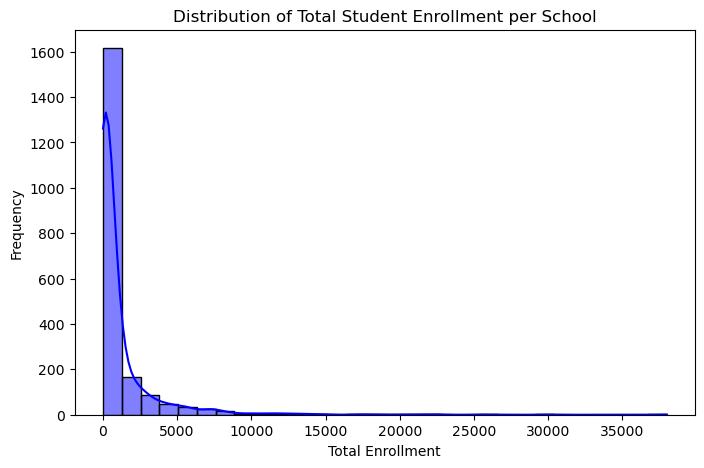

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df["total_enrollment"], bins=30, kde=True, color="blue")
plt.title("Distribution of Total Student Enrollment per School")
plt.xlabel("Total Enrollment")
plt.ylabel("Frequency")
plt.show()

Distribution of Total Student Enrollment per School
-----------

In [43]:
df["total_boys"] = df.iloc[:, 15:29].sum(axis=1)
df["total_girls"] = df.iloc[:, 29:].sum(axis=1)

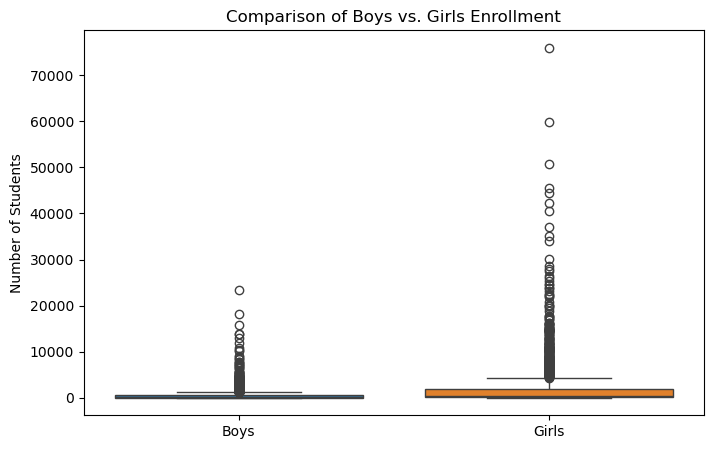

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["total_boys", "total_girls"]])
plt.title("Comparison of Boys vs. Girls Enrollment")
plt.ylabel("Number of Students")
plt.xticks(ticks=[0, 1], labels=["Boys", "Girls"])
plt.show()


Comparison of Boys vs Girls Enrollment
--------

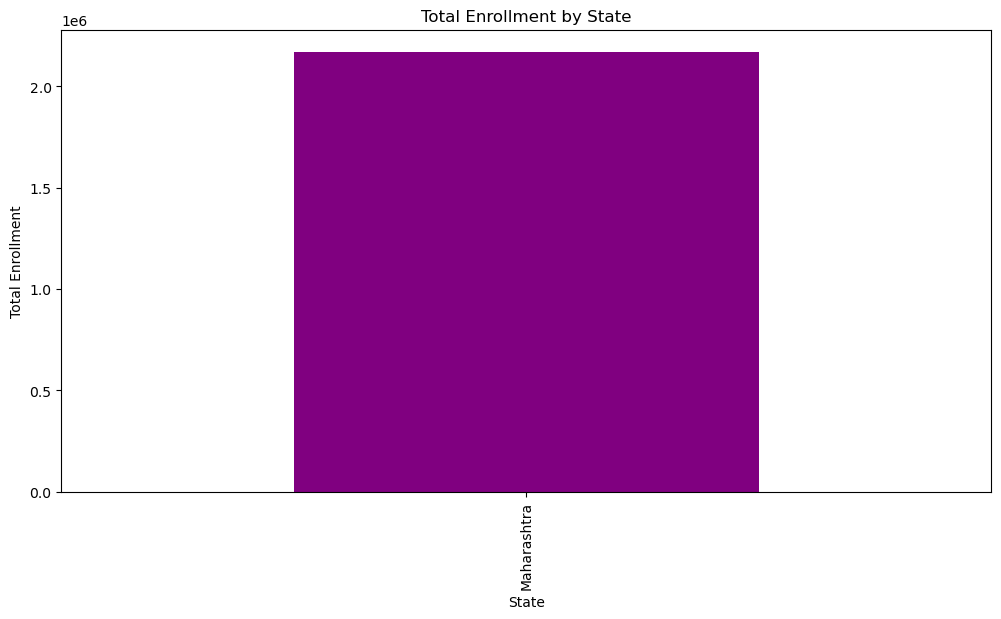

In [45]:
plt.figure(figsize=(12, 6))
df.groupby("state_name")["total_enrollment"].sum().sort_values().plot(kind='bar', color='purple')
plt.title("Total Enrollment by State")
plt.xlabel("State")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=90)
plt.show()

Total Enrollment by state
-----

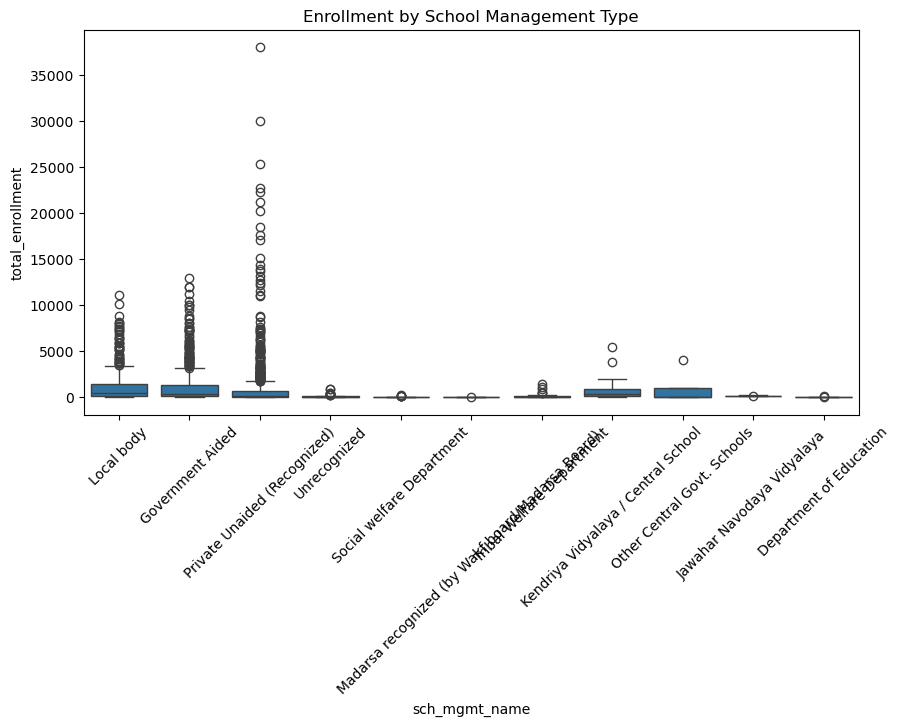

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["sch_mgmt_name"], y=df["total_enrollment"])
plt.title("Enrollment by School Management Type")
plt.xticks(rotation=45)
plt.show()


Enrollment by school Management Type
-----

In [47]:
class_cols = df.columns[15:]
class_enrollment = df[class_cols].sum()


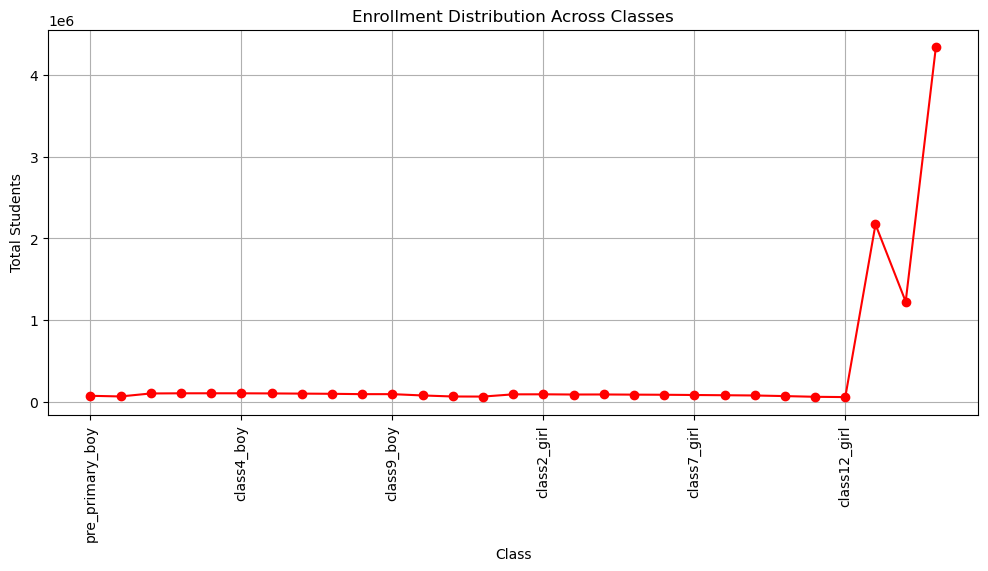

In [48]:
plt.figure(figsize=(12, 5))
class_enrollment.plot(kind="line", marker='o', color='red')
plt.title("Enrollment Distribution Across Classes")
plt.xlabel("Class")
plt.ylabel("Total Students")
plt.xticks(rotation=90)
plt.grid()
plt.show()

Enrollment Disturbution Across classess
------

In [49]:
def plot_pie(data, labels, title):
    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)  
    # autopct shows percentage, startangle rotates the chart
    plt.title(title)  
    plt.axis('equal')  # Ensures pie chart is circular
    plt.show()  


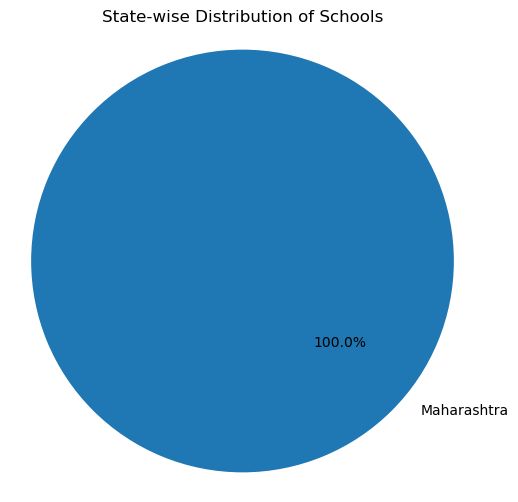

In [50]:
state_counts = df["state_name"].value_counts()
plot_pie(state_counts, state_counts.index, "State-wise Distribution of Schools")


State wise disturbution of Schools
-----

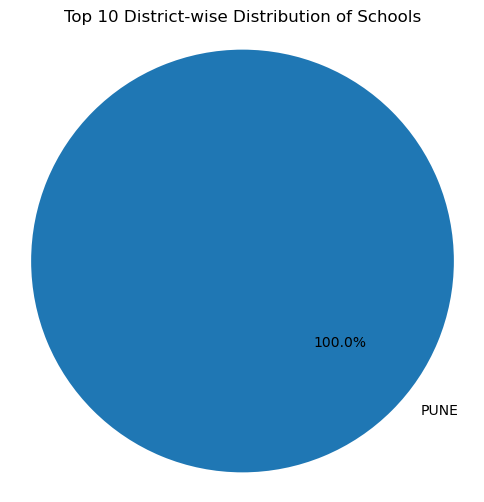

In [51]:
district_counts = df["district_name"].value_counts().head(10)  
plot_pie(district_counts, district_counts.index, "Top 10 District-wise Distribution of Schools")


Top 10 District-wise Distubution of Schools
-----

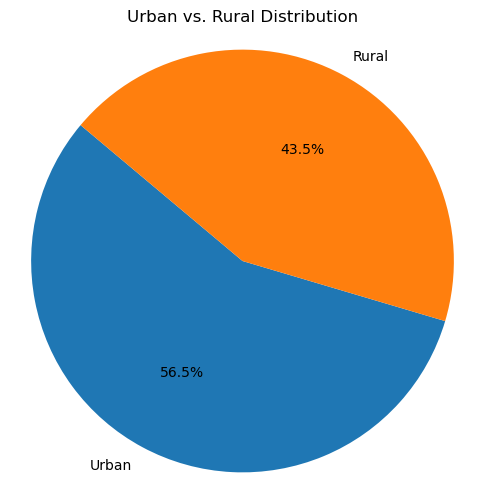

In [52]:
loc_counts = df["loc_name"].value_counts()
plot_pie(loc_counts, loc_counts.index, "Urban vs. Rural Distribution")


Urban vs Rural Disturbution
-------

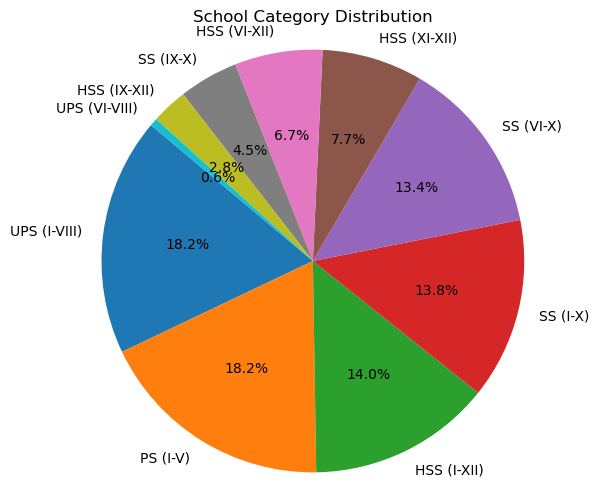

In [53]:
category_counts = df["school_category"].value_counts()
plot_pie(category_counts, category_counts.index, "School Category Distribution")


School Category Distribution
------

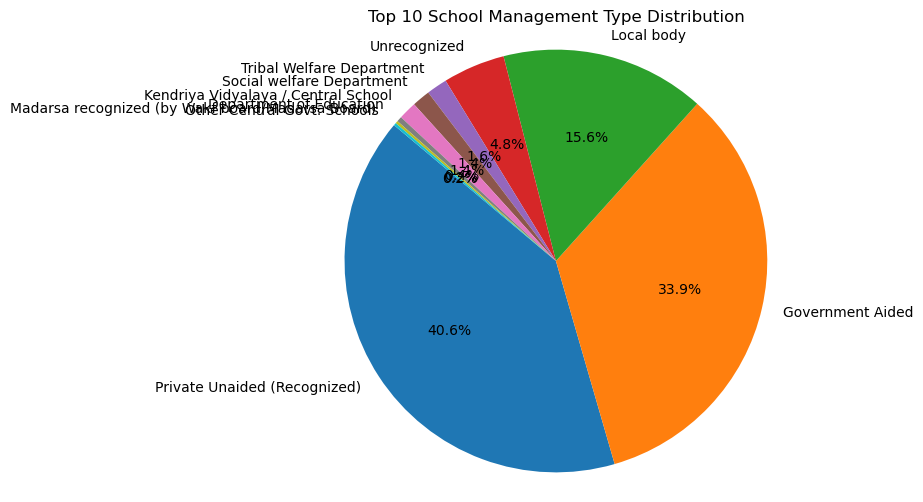

In [54]:
management_counts = df["sch_mgmt_name"].value_counts().head(10)  
plot_pie(management_counts, management_counts.index, "Top 10 School Management Type Distribution")


Top 10 School Management Type Disturbution
-------

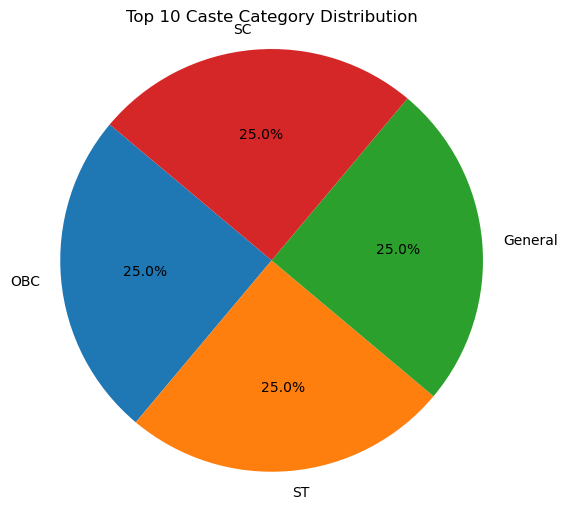

In [55]:
caste_counts = df["caste_name"].value_counts().head(10)  
plot_pie(caste_counts, caste_counts.index, "Top 10 Caste Category Distribution")


Top 10 Caste Category Distribution
------

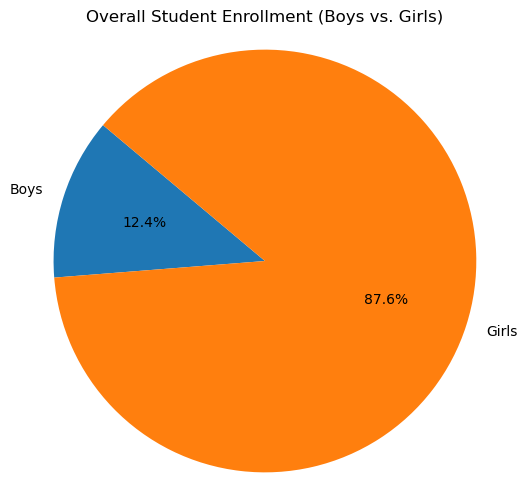

In [56]:
total_boys = df.iloc[:, 15:29].sum().sum()  # Sum all boys' columns
total_girls = df.iloc[:, 29:].sum().sum()  # Sum all girls' columns
plot_pie([total_boys, total_girls], ["Boys", "Girls"], "Overall Student Enrollment (Boys vs. Girls)")


Overall student Enrollement
-------

primary_boys = df.iloc[:, 17:22].sum().sum()  # Classes 1-5 boys
primary_girls = df.iloc[:, 29:34].sum().sum()  # Classes 1-5 girls
secondary_boys = df.iloc[:, 22:29].sum().sum()  # Classes 6-12 boys
secondary_girls = df.iloc[:, 34:].sum().sum()  # Classes 6-12 girls
plot_pie([primary_boys + primary_girls, secondary_boys + secondary_girls], 
         ["Primary", "Secondary"], "Primary vs. Secondary Enrollment")


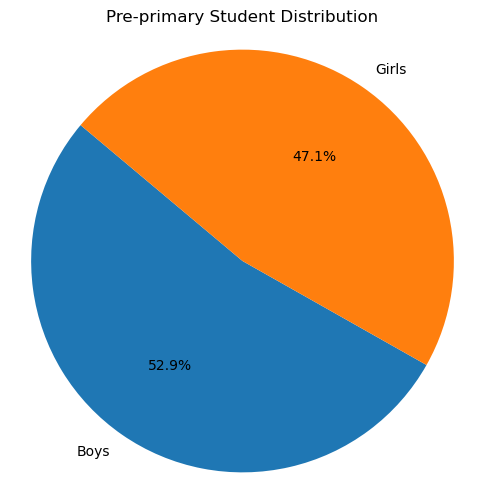

In [58]:
pre_primary_boys = df["pre_primary_boy"].sum()
pre_primary_girls = df["pre_primary_girl"].sum()
plot_pie([pre_primary_boys, pre_primary_girls], ["Boys", "Girls"], "Pre-primary Student Distribution")


Pre-primary student distribution
-------

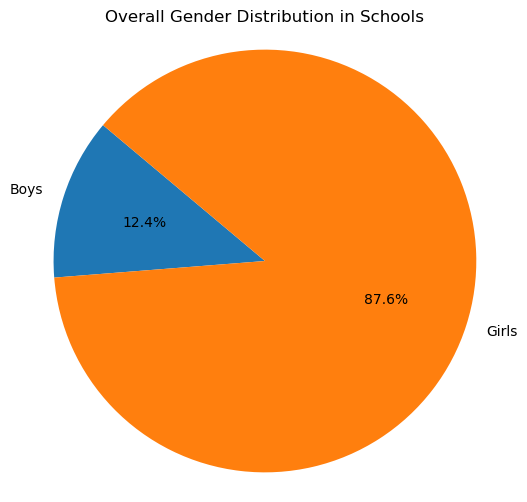

In [59]:
plot_pie([total_boys, total_girls], ["Boys", "Girls"], "Overall Gender Distribution in Schools")


Overall Gender Distribution in Schools
------

In [60]:
categorical_cols = ["state_name", "district_name", "udise_block_name", "sch_mgmt_name", "school_category"]
numeric_cols = ["st_code", "dt_code", "block_cd"]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [62]:
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [63]:
X = df_encoded[categorical_cols + numeric_cols]
y = df_encoded["total_enrollment"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [66]:
y_pred = model.predict(X_test)

In [67]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [68]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 1124.5307332647005
Root Mean Squared Error (RMSE): 2226.165348929637
